In [17]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium import plugins
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv("../../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data.Date = pd.to_datetime(data.Date)
data['Hour'] = pd.to_datetime(data.Time).dt.hour
data['DayOfWeek'] = data.Date.dt.dayofweek
data['Month'] = data.Date.dt.month
data['Minutes'] = pd.to_datetime(data.Time).dt.minute
data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)

In [3]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Month,Minutes
0,110308742,MISSING PERSON,FOUND PERSON,4,2011-04-15,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,16,4,0
1,90316914,WARRANTS,WARRANT ARREST,3,2009-03-26,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,12,3,28
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,4,2013-02-15,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,2,2,0
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",1,2008-01-15,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,20,1,13
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,5,2007-05-26,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,18,5,10


#### First start by plotting a map of San Francisco with a nice tight zoom

In [4]:
map_hooray = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
map_hooray

#### Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [5]:
map_hooray = folium.Map(location=[37.773972, -122.431297],
                        tiles="Stamen Toner", zoom_start = 12)
folium.Marker([37.77919, -122.41914], popup="City Hall").add_to(map_hooray)
map_hooray

#### Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like

In [6]:
drug = data[(data.Category == "DRUG/NARCOTIC") &\
           (data.Date.dt.year == 2016) &\
           (data.Date.dt.month <= 7) &\
           (data.Date.dt.month >= 6)]

In [7]:
map_drug = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
for index, row in drug.iterrows():
    folium.CircleMarker([row.Y, row.X],fill_color='#43d9de', radius=2).add_to(map_drug)
map_drug

#### To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.

In [8]:
sex_data = data[data.Category == "SEX OFFENSES, NON FORCIBLE"]

In [9]:
sex_map = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
heat_data = [[row.Y,row.X] for index, row in sex_data.iterrows()]
HeatMap(heat_data).add_to(sex_map)
sex_map

#### Now, comment on the differences between scatter plots and heatmaps. . - What can you see using the scatter-plots that you can't see using the heatmaps? . - And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

Heatmaps allow to easily visualize how dense an area on the map is. In a scatter plot points may overlap each other, and although it is possible to identify the involved areas, it is not immediatly clear how many crimes happened in the same spot/area.

On the other hand, heatmaps loose granularity and details since they do not plot each single crime occurrence individually but instead group them toghether in more smooth shaped circles. Scatter plot keep the detailed representation of each single occurrence.

In [10]:
zoom = 10
sex_map_params = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
HeatMap(heat_data, max_zoom=zoom, radius=10).add_to(sex_map_params)
sex_map_params

By increasing the radius, we get less granularity and allow the map to aggregate points on a wider area. On the other hans, decreasing it will create geographically smaller aggregations of points.

Max_zoom allows to get the highest intensity of the points at the desired level of zoom. If max_zoom is high, the more we zoom in the map, the more intense the points will get. The lower the max_zoom the sooner the points will reach their highest intensity (given by the color, red for highest) and therefore, zooming in won't add much coloring information as it won't change.

#### Use your detective skills to find out what's going on in that building on the 800 block of Bryant street

The Hall of Justice error may be due to the lack of position recorded in the crime record and when the case is discussed in the Hall, the default location of the Hall itself gets added to the record instead.

#### For the final element of working with heatmaps, let's now use the cool Folium functionality HeatMapWithTime to create a visualization of how the patterns of your favorite crime-type changes over time.

#### Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).

In [11]:
crime = "DRUNKENNESS"
crime_data = data[data.Category == crime]
crime_data = crime_data.dropna(axis=0, subset=['X','Y', 'Hour'])

#### Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.

In [14]:
crime_heat_data = [[[row.Y,row.X]\
              for index, row in crime_data[(crime_data['DayOfWeek'] == i) &\
                                           (crime_data['Hour'] == j)].iterrows()]\
              for j in range(0,24) for i in range(4,7)]

#### Comment on your results: What patterns does your movie reveal? Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

In [15]:
heat_map = folium.Map(location=[37.773972, -122.431297], zoom_start = 12)
#
hm = plugins.HeatMapWithTime(crime_heat_data,auto_play=True,\
                             radius=10,\
                             max_opacity=0.8)
hm.add_to(heat_map)
# Display the map
heat_map

We have precedently seen that Drunkenness has a spike in crime occurrences around weekend nights. We have therefore plotted the timeline of the distribution of this type of crime over the 24h from friday to sunday to identify the development of occurrences over the weekend and the most reported weekend hours.

### Part 2: Errors in the data. The importance of looking at raw (or close to raw) data.

#### Exercise: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.

#### In the hourly activity for PROSTITUTION something surprising is going on on Wednesday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

In [18]:
crime = "PROSTITUTION"
prostitution_data = data[(data.Category==crime)]

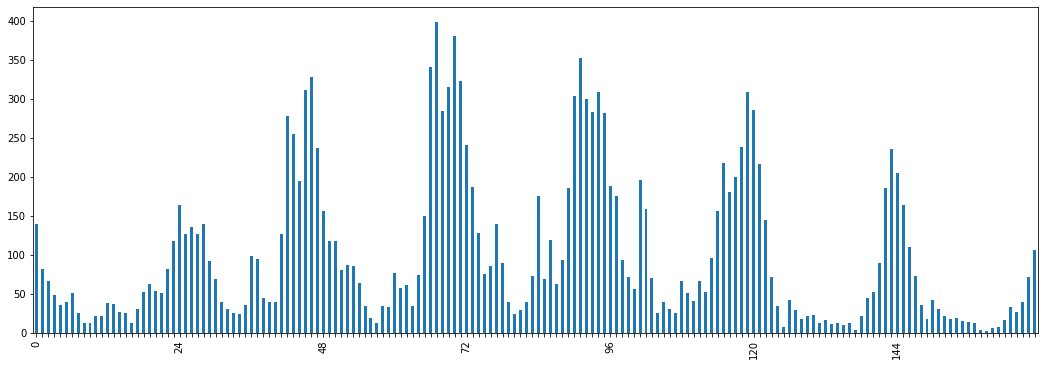

In [19]:
fig = plt.figure(1, figsize=(18, 6))
ax = fig.add_subplot(111)
prostitution_data.groupby(['DayOfWeek', 'Hour']).count().reset_index().IncidntNum.plot(ax=ax, kind='bar')
# Show only the beginning of the dat
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 24) != 0:
        t.set_visible(False)

#### In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling.

...

The recording of crimes at specific intervals shapes the data distribution to have multiple means and not being evenly or realistically distributed. In this scenario, statistical values such as the mean, would be biased and made not relevant by this multi-mean distribution.

...

The Hall of Justice error may be due to the lack of position recorded in the crime record and when the case is discussed in the Hall, the default location of the Hall itself gets added to the record instead. This could picture the nighborhood where the Hall is placed as one of the most sex offended ones. This conclusion would indeed be wrong as it is deducted by wrongly filled data.

#### Find your own example of human noise in the data and visualize it.

In [ ]:
data[data]